#  ПРИКЛАД ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ № 3. ПРОСТОРОВА ФІЛЬТРАЦІЯ
#  2. Підвіщення контрасту

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [5]:
## Завантаження файлу зображення
filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
## filename = 'd:/test_simpl_200.jpg'
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (900, 900, 3) IMAGE SIZE 2430000
ROWS NUMBER 900 CLMS NUMBER 900 PIX NUMBER 810000 Bins 256


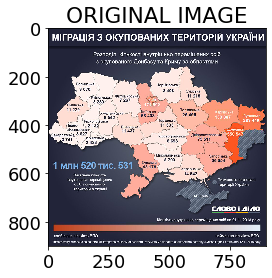

In [6]:
## Вивід оррігінального зображення на екран
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

MASK SHAPE (3, 3) MASK SIZE 9
FILTER MASK
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


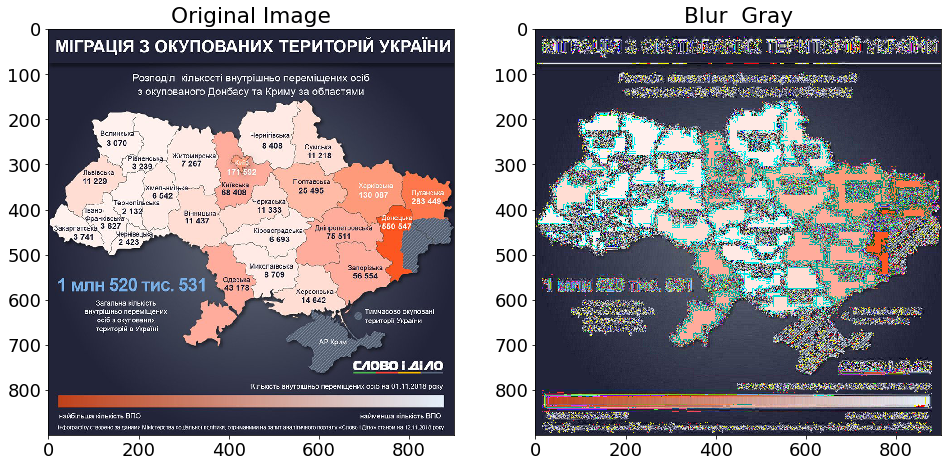

In [7]:
## Визначення маски фильтру підвищення контрасту
mask_row = 3
mask_clm = 3
mask_sharp = np.zeros ( (mask_row, mask_clm), dtype = np.float32)
print ('MASK SHAPE', mask_sharp.shape, 'MASK SIZE', mask_row*mask_clm)
mask_sharp[0,0] = mask_sharp[0,1] = mask_sharp[0,2] = -1 
mask_sharp[1,0] = mask_sharp[1,2] = -1 
mask_sharp[1,1] = 9
mask_sharp[2,0] = mask_sharp[2,1] = mask_sharp[2,2] = -1 
print('FILTER MASK')
print(mask_sharp)

## Визначення файлу перетворенного зображення
pixel = np.zeros(3, dtype=np.float32)
filtr_im_ = np.zeros ( (rows_num, clms_num, 3), dtype = np.int16)
filtr_im_sharp = np.zeros ( (rows_num, clms_num, 3), dtype = np.uint8)

#for i in  range (1, (rows_num-1), 1):
#    for j in  range (1, (clms_num -1), 1):
for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num -1), 1):
        pixel[:] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                pixel += mask_sharp[l,k]*np.float32(test_im [i-(1-k), j-(1-l), : ])
                ## print (i, j, l, k, test_im [i-(1-k), j-(1-l), : ], pixel)                        
        filtr_im_ [i, j, :] = np.int16(pixel [:])
        filtr_im_sharp [i, j, :]  = np.int8(pixel [:])
        ## print (i, j, test_im [i, j, : ], filtr_im_ [i, j, :])                        

'''
max_pix_color = np.zeros(3,np.int16)        
min_R = np.min(filtr_im_[:,:, 0])
min_G = np.min(filtr_im_[:,:, 1])
min_B = np.min(filtr_im_[:,:, 2])
print(min_R, min_G, min_B)
max_R = np.max(filtr_im_[:,:, 0])
max_G = np.max(filtr_im_[:,:, 1])
max_B = np.max(filtr_im_[:,:, 2])
print(max_R, max_G, max_B)
Koef_R =  256/(max_R - min_R)
Koef_G =  256/(max_G - min_G)
Koef_B =  256/(max_B - min_B)
print(Koef_R, Koef_G, Koef_B)

for i in  range (1, (15-1), 1):
    for j in  range (1, (15 -1), 1):
        filtr_im_sharp[i,j, 0] = Koef_R*filtr_im_ [i, j, 0]-min_R  
        filtr_im_sharp[i,j, 1] = Koef_G*filtr_im_ [i, j, 1]-min_G
        filtr_im_sharp[i,j, 2] = Koef_B*filtr_im_ [i, j, 2]-min_B
        print (i, j, test_im [i, j, : ], filtr_im_ [i, j, :], filtr_im_sharp[i, j, :])                        
'''
        
        ## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_sharp)
ax[1].set_title("Blur  Gray")
plt.show()